In [1]:
import numpy as np
import pandas as pd
from tensorflow import random

X = pd.read_csv('../data/aps_failure_training_feats.csv')
y = pd.read_csv('../data/aps_failure_training_target.csv')

In [2]:
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_test.columns)

X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

np.random.seed(seed)
random.set_seed(seed)
model = Sequential()

model.add(Dense(4, activation='relu', kernel_initializer='uniform', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1, validation_split=0.2, shuffle=False)

Epoch 1/100
1920/1920 [==============================] - 4s 2ms/step - loss: 0.1118 - accuracy: 0.9833 - val_loss: 0.0470 - val_accuracy: 0.9842
Epoch 2/100
1920/1920 [==============================] - 3s 1ms/step - loss: 0.0645 - accuracy: 0.9834 - val_loss: 0.0446 - val_accuracy: 0.9842
Epoch 3/100
1920/1920 [==============================] - 3s 2ms/step - loss: 0.0622 - accuracy: 0.9834 - val_loss: 0.0450 - val_accuracy: 0.9842
Epoch 4/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0598 - accuracy: 0.9834 - val_loss: 0.0444 - val_accuracy: 0.9842
Epoch 5/100
1920/1920 [==============================] - 3s 2ms/step - loss: 0.0606 - accuracy: 0.9834 - val_loss: 0.0442 - val_accuracy: 0.9842
Epoch 6/100
1920/1920 [==============================] - 4s 2ms/step - loss: 0.0577 - accuracy: 0.9834 - val_loss: 0.0443 - val_accuracy: 0.9842
Epoch 7/100
1920/1920 [==============================] - 3s 1ms/step - loss: 0.0587 - accuracy: 0.9834 - val_loss: 0.0444 - val_ac

1920/1920 [==============================] - 6s 3ms/step - loss: 0.0540 - accuracy: 0.9834 - val_loss: 0.0487 - val_accuracy: 0.9842
Epoch 58/100
1920/1920 [==============================] - 6s 3ms/step - loss: 0.0526 - accuracy: 0.9834 - val_loss: 0.0471 - val_accuracy: 0.9842
Epoch 59/100
1920/1920 [==============================] - 6s 3ms/step - loss: 0.0543 - accuracy: 0.9834 - val_loss: 0.0492 - val_accuracy: 0.9842
Epoch 60/100
1920/1920 [==============================] - 6s 3ms/step - loss: 0.0515 - accuracy: 0.9834 - val_loss: 0.0509 - val_accuracy: 0.9842
Epoch 61/100
1920/1920 [==============================] - 6s 3ms/step - loss: 0.0528 - accuracy: 0.9834 - val_loss: 0.0585 - val_accuracy: 0.9842
Epoch 62/100
1920/1920 [==============================] - 3s 2ms/step - loss: 0.0517 - accuracy: 0.9834 - val_loss: 0.0522 - val_accuracy: 0.9842
Epoch 63/100
1920/1920 [==============================] - 4s 2ms/step - loss: 0.0521 - accuracy: 0.9834 - val_loss: 0.0537 - val_accuracy

In [6]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict(X_test)

375/375 [==============================] - 0s 923us/step


In [7]:
from sklearn.metrics import confusion_matrix
y_pred_class1 = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred_class1)
print(cm)

[[11788     0]
 [  212     0]]


In [8]:
TN = cm[0, 0]
FN = cm[1, 0]
FP = cm[0, 1]
TP = cm[1, 1]

In [9]:
Sensitivity = TP / (TP + FN)
print(f'Sensitivity: {Sensitivity:.4f}')

Sensitivity: 0.0000


In [10]:
Specificity = TP / (TP + FN)
print(f'Specificity: {Specificity:.4f}')

Specificity: 0.0000


In [11]:
Precision = TP / (TP + FP)
print(f'Precision: {Precision:.4f}')

Precision: nan


C:\Users\lvcie\AppData\Local\Temp\ipykernel_19608\653747717.py:1: RuntimeWarning: invalid value encountered in longlong_scalars
  Precision = TP / (TP + FP)


In [13]:
False_Positive_rate = FP / (FP + TN)
print(f'False positive rate: {False_Positive_rate:.4f}')

False positive rate: 0.0000


In [14]:
y_pred_class2 = y_pred > 0.3

In [17]:
cm = confusion_matrix(y_test, y_pred_class2)
print(cm)

[[11788     0]
 [  212     0]]


In [18]:
TN = cm[0, 0]
FN = cm[1, 0]
FP = cm[0, 1]
TP = cm[1, 1]

In [19]:
Sensitivity = TP / (TP + FN)
print(f'Sensitivity: {Sensitivity:.4f}')

Sensitivity: 0.0000


In [23]:
Specificity = TP / (TP + FN)
print(f'Specificity: {Specificity:.4f}')

Specificity: 0.0000


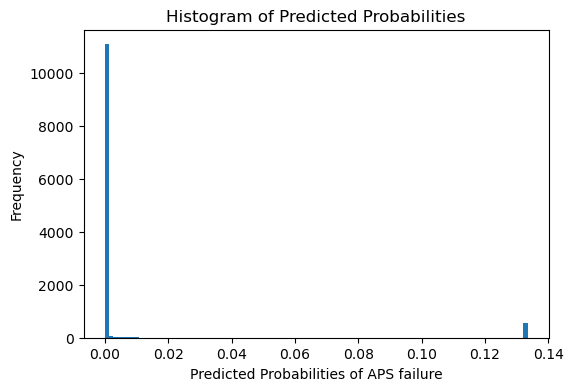

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 4))
plt.hist(y_pred_prob, bins=100)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel("Predicted Probabilities of APS failure")
plt.ylabel('Frequency')
plt.show()